## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head(249)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
244,g288,Capomulin,Male,3,19,45,37.074024,1
245,i334,Ramicane,Female,8,20,0,45.000000,0
246,i334,Ramicane,Female,8,20,5,41.020518,0
247,i334,Ramicane,Female,8,20,10,41.631247,0


In [4]:
# Checking the number of mice.
total_mice = len(pd.unique(merge_df["Mouse ID"]))
total_mice_df = pd.DataFrame({
    "Number of Mice":[total_mice]})
total_mice_df


,Number of Mice
0,249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint and show 
# all data for that ID, search by iD and get all rows showing for this ID
# highlighting only the first duplicate

merge_df[["Mouse ID","Timepoint"]]
duplicate_rows = merge_df[merge_df.duplicated()]
duplicate_rows



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = merge_df[merge_df["Mouse ID"]=="g989"]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Get names of indexes for which column Mouse ID has value g989
mice_index = merge_df[merge_df["Mouse ID"]=="g989"].index
merge_df.drop(mice_index, inplace=True)
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = len(pd.unique(merge_df["Mouse ID"]))
total_mice_df_clean = pd.DataFrame({
    "Number of Mice Clean":[total_mice_clean]})
total_mice_df_clean


,Number of Mice Clean
0,248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumor_mean = merge_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = merge_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance = merge_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_std = merge_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_SEM = merge_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

regime_overview = pd.DataFrame({"Mean":tumor_mean, "Median":tumor_median, "Variance":tumor_variance, "Std Dev":tumor_std, "SEM":tumor_SEM})
regime_overview




,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen (wants us to google)
tumor_aggregate = merge_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
tumor_aggregate

# Using the aggregation method, produce the same 
# summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

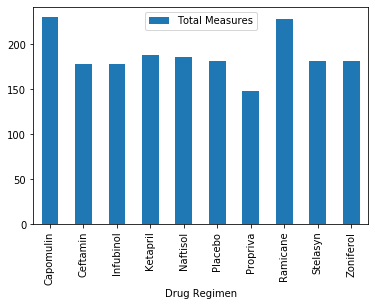

In [11]:
# Generate a bar plot showing the total number of measurements taken 
# on each drug regimen using pandas. 
# PyPlot more usable for larger databases 
# .plt is PyPlot
# .

total_meas = merge_df.groupby("Drug Regimen").count()["Mouse ID"]
total_meas_df = pd.DataFrame({"Total Measures":total_meas})

# total_measure_df = pd.DataFrame(total_meas_df,columns=['Drug Regimen','Total Measures'])
total_meas_df.plot(kind='bar')
plt.show()


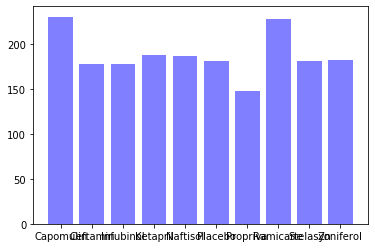

In [16]:
# Generate a bar plot showing the total number of measurements taken 
# on each drug regimen using pandas. 
# PyPlot more usable for larger databases 
# .plt is PyPlot
# .

total_meas = merge_df.groupby("Drug Regimen").count()["Mouse ID"]
total_meas_df = pd.DataFrame({"Total Measures":total_meas})
# x_axis = np.arange(len(total_meas_df))
# tick_locations = [value for value in x_axis]
# total_meas_df

# Create a list indicating where to write x labels and set figure size to 
# adjust for space
# plt.figure(figsize=(15,6))
plt.bar(total_meas_df.index.values,total_meas_df["Total Measures"], color = "b", alpha = .5, align = "center")
# plt.xticks(tick_locations, rotation = "vertical")

# 
# total_measure_df = pd.DataFrame(total_meas_df,columns=['Drug Regimen','Total Measures'])
# merge_df.plot(x ="Drug Regimen",y = "Total Measures", kind = 'bar')
plt.show()


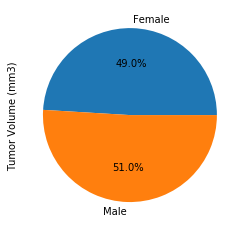

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = merge_df.groupby("Sex").count()["Tumor Volume (mm3)"]
gender_dist.plot(kind = "pie",autopct="%1.1f%%")
plt.show()


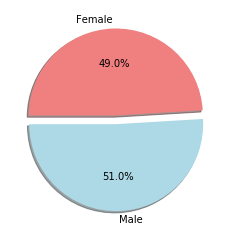

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# gender_dist = merge_df.groupby("Sex").count()["Tumor Volume (mm3)"]
# print(gender_dist)
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["lightblue", "lightcoral"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [83]:


# Start by getting the last (greatest) timepoint for each mouse
latest_timepoint = merge_df.groupby("Mouse ID").max()["Timepoint"].reset_index()
# latest_timepoint_df = pd.DataFrame({"Latest Timepoint": latest_timepoint}).reset_index()
latest_timepoint
merge_df

# Merge this group df with the original dataframe to get the 
# tumor volume at the last timepoint
new_merge_df = pd.merge(latest_timepoint,merge_df ,on=["Mouse ID","Timepoint"])
# # organized_df = new_merge_df [["Mouse ID", "Drug Regimen","Latest Timepoint", "Tumor Volume (mm3)" ]]
new_merge_df

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [88]:


# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in drug_list: 
    drug_volume = new_merge_df.loc[new_merge_df["Drug Regimen"]==x]["Tumor Volume (mm3)"]
#     print(x,drug_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume.append(drug_volume)
    # outlier formula should be here 
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

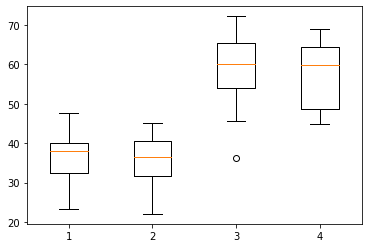

In [90]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
